<a href="https://colab.research.google.com/github/Efyt14/copilot-codespaces-vscode/blob/main/Handout_3_Enrique_Sanchez_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>ANALYSIS AND NUMERICAL METHODS - HANDOUT 3</b></h1>
   

*   Name: Enrique Sanchez Lopez
*   At: EPSJ - University of Jaén
*   email: <a href="mailto:esl00028@red.ujaen.es">esl00028@red.ujaen.es</a>

In [1]:
#Import all the libraries we can use:
import math
import numpy as np
import matplotlib.pyplot as plt

#**Implementation of mathematical methods**

#01.
## We would like to write our own exponential function exponential(x) that returns e^x for a given real number x and to this end we will use the following strategy:


In [ ]:
# Side note e^x = 1 + x + x^2/2! + x^3/3! ...

# Taylor expansion for e^x for x in [-1, 1]
def taylor_series(x, order=10):
    result = 1.0  # Start with the first term (1)
    term = 1.0    # The first term in the series
    for n in range(1, order + 1):
        term *= x / n  # Calculate the next term (x^n / n!)
        result += term  # Add the term to the result
    return result

# Recursive exponential function
def exponential(x):
    if -1 <= x <= 1:
        # If x is within [-1, 1], use the Taylor series
        return taylor_series(x)
    elif x > 1:
        # If x > 1, use the recursive rule e^x = (e^(x/2))^2
        half_exp = exponential(x / 2)
        return half_exp * half_exp
    elif x < -1:
        # If x < -1, use the recursive rule e^x = (e^(x/2))^2
        half_exp = exponential(x / 2)
        return half_exp * half_exp

# Compare exponential with math.exp for integers from -10 to 10
print(str(f"{'n':>3} | {'myExp':>30} | {'math.exp':>30} | {'error':>30}"))
print("-" * 95)

for n in range(-10, 11):  # To include 0
    myExp = exponential(n)
    mathExp = math.exp(n)
    error = abs(myExp - mathExp)
    print(str(f"{n:>3} | {myExp:>30.15e} | {mathExp:>30.15e} | {error:>30.15e}"))

  n |                          myExp |                       math.exp |                          error
-----------------------------------------------------------------------------------------------
-10 |          4.539992994613870e-05 |          4.539992976248485e-05 |          1.836538462540033e-13
 -9 |          1.234098042345870e-04 |          1.234098040866796e-04 |          1.479074566816674e-13
 -8 |          3.354627965224517e-04 |          3.354626279025119e-04 |          1.686199398967698e-10
 -7 |          9.118820595800743e-04 |          9.118819655545162e-04 |          9.402555806430762e-11
 -6 |          2.478752218460526e-03 |          2.478752176666358e-03 |          4.179416795285773e-11
 -5 |          6.737947012713791e-03 |          6.737946999085467e-03 |          1.362832416362814e-11
 -4 |          1.831564349190199e-02 |          1.831563888873418e-02 |          4.603167812200493e-09
 -3 |          4.978706878759309e-02 |          4.978706836786394e-02 |         

#02.
##Matrices in Python are usually represented as lists of lists of numbers (all having the same length). For instance, the identity matrix of order 3 can be written as [[1,0,0],[0,1,0],[0,0,1]]. Write two functions matrixSum(A,B) and matrixProduct(A,B) that take two matrices A and B as input and return their sum and product, respectively. These functions must return False if the operation is not defined.

In [ ]:
def matrixSum(A, B):
    # Check if the matrices A and B have the same dimensions
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        return "Matrices must have the same number of rows and columns if you want to operate with them!!!"

    # Create a result matrix to store the sum
    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(A[0])):
            row.append(A[i][j] + B[i][j])  # Add corresponding elements
        result.append(row)

    return result


def matrixProduct(A, B):
    # Check if the number of columns in A equals the number of rows in B
    if len(A[0]) != len(B):
        return "Matrices can't be multiplied if dimensions don't match!!!"

    # Create a result matrix initialized with zeros
    result = []
    for i in range(len(A)):  # Loop over rows of A
        row = []
        for j in range(len(B[0])):  # Loop over columns of B
            # Compute the product of row i of A and column j of B
            product = sum(A[i][k] * B[k][j] for k in range(len(B)))
            row.append(product)
        result.append(row)

    return result

# Example usage
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]

sum = matrixSum(A, B)
product = matrixProduct(A, B)

print("Matrix Sum:")
print(sum)  # Expected: [[6, 8], [10, 12]]

print("Matrix Product:")
print(product)  # Expected: [[19, 22], [43, 50]]

Matrix Sum:
[[6, 8], [10, 12]]
Matrix Product:
[[19, 22], [43, 50]]


#03.
## Write a function power(z,w) with input two complex numbers z and w that returns the the principal value of the power z^w. Remark. In this exercise, you must represent a complex number z = x + iy in Python as a list of two elements z=[x,y]. You are not allowed to use built-in complex numbers.

In [ ]:
# Function to compute the power of two complex numbers
def power(z, w):
    x, y = z  # z = x + iy
    u, v = w  # w = u + iv

    # Step 1: Convert z = x + iy to polar form
    r = math.sqrt(x**2 + y**2)  # Modulus of z
    theta = math.atan2(y, x)    # Argument (angle) of z

    # Step 2: Compute log(z) = log(r) + i*theta
    log = math.log(r)         # Real part of log(z)
    # The Imaginary part of log(z) is the theta previously calculated

    # Step 3: Compute w * log(z)
    real_part = u * log - v * theta  # Real part of w * log(z)
    imag_part = v * log + u * theta  # Imaginary part of w * log(z)

    # Step 4: Compute e^(w * log(z)) = e^(real_part + i * imag_part)
    result_real = math.exp(real_part) * math.cos(imag_part)  # Real part of z^w
    result_imag = math.exp(real_part) * math.sin(imag_part)  # Imaginary part of z^w

    # Return the result as a list [real_part, imag_part]
    return [result_real, result_imag]

# Example usage
z = [2, 3]  # Complex number z = 2 + 3i
w = [1, 1]  # Complex number w = 1 + i

result = power(z, w)
print("Result of z^w:" + str(result))

Result of z^w:[-0.8636068988831277, 1.0368893969147763]


#04.
## Apollo XI was the space mission in which human beings first landed on the Moon, commanded by the famous astronaut Neil Armstrong. In order to compute trajectories, spaceships need to compute tons of sines and cosines in a short time, and Apollo XI had 30 lines of code for this purpose.

###a) Plot on the same axes sin(πx/2) and the approximation 2((Ax2 + B)x 2 + C)x.
###b) It looks like the approximation is bad outside the interval [−0.5, 0.5] so sines outside this range could not be computed properly. Can you fix this by getting advantage of the symmetries of the sine function, that is, from the fact that sin(π − x) = sin(x)?


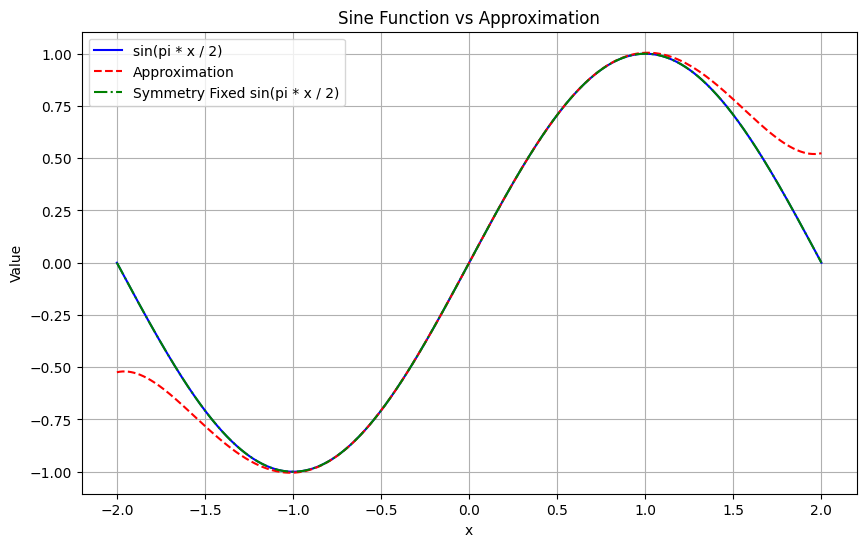

In [ ]:
# Define constants A, B, and C using given formulas
A = (math.pi / 2)**5 / (2 * math.factorial(5))
B = -(math.pi / 2)**3 / (2 * math.factorial(3))
C = (math.pi / 2) * (1 / 2)

# Define the sine approximation function
def sineApproximation(x):
    return 2 * ((A * x**2 + B) * x**2 + C) * x

# Original sine function sin(pi * x / 2)
def originalSine(x):
    return np.sin(np.pi * x / 2)

# Symmetry fix for sine outside [-0.5, 0.5]
def fixedSine(x):
    return originalSine(np.abs(x)) * (x / np.abs(x)) #To play with the sign

x = np.linspace(-2, 2, 1000)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, originalSine(x), label='sin(pi * x / 2)', color='blue')
plt.plot(x, sineApproximation(x), label='Approximation', color='red', linestyle='--')  #The linestyle is to make the line discontinous
plt.plot(x, fixedSine(x), label='Symmetry Fixed sin(pi * x / 2)', color='green', linestyle='-.') #Same here

# Add labels and legends
plt.title('Sine Function vs Approximation')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

#**ROOT FINDING METHODS**

#05.
##Plot the function f(x) = x^4 + 2x^3 + 1 to show that f(x) = 0 has a real solution in [−2, −1.5] and another real solution in [−1, −0.5]. Find numerical approximations of these solutions by the following methods:
###(a) Bisection on each of the above intervals.
###(b) Regula falsi on each of the above intervals.
###(c) Newton-Raphson with initial guesses x1 = −2 and x1 = −1.
###(d) By transforming the equation into fixed-point equations.
####Use as stopping condition an error of 10−8 for the bisection method, and a difference of 10−4 between consecutive approximations for the other three methods.


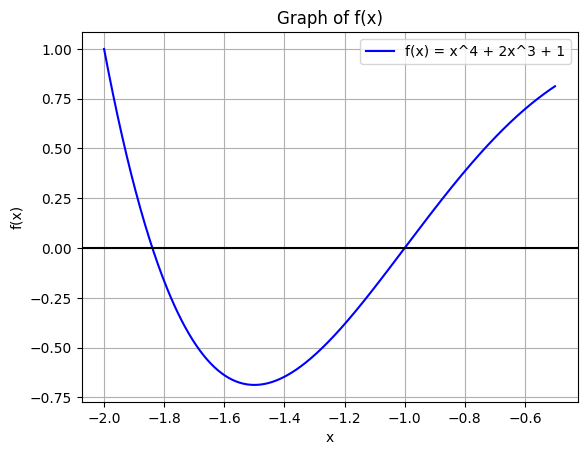

Bisection root in [-2, -1.5]: -1.8392867520451546
Regula Falsi root in [-2, -1.5]: -1.8392724181985864
Newton-Raphson root in [-2, -1.5]: -1.8392867554321544
Fixed-point iteration root in [-2, -1.5]: -1.8392977602513978
Bisection root in [-1, -0.5]: -0.5000000074505806
Regula Falsi root in [-1, -0.5]: -1.0
Newton-Raphson root in [-1, -0.5]: -1.0
Fixed-point iteration root in [-1, -0.5]: -1.0


In [58]:
# Define the function f(x) = x^4 + 2x^3 + 1
def f(x):
    return x**4 + 2*x**3 + 1

# Bisection method
def bisection(f, a, b, error):
    while abs(b - a) / 2 > error:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Regula falsi method
def regulaFalsi(f, a, b, tolerance):
    c = (a * f(b) - b * f(a)) / (f(b) - f(a))
    while abs(f(c)) > tolerance:
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
    return c

# Newton-Raphson method
def derivative(f, x):
    h = 1e-6
    return (f(x + h) - f(x)) / h

def newtonRaphson(f, a, tolerance):
    c = a - f(a) / derivative(f, a)
    while abs(c - a) > tolerance:
        a = c
        c = a - f(a) / derivative(f, a)
    return c

# Fixed-point iteration method (for transformed equation)
def g(x):
    return (-2 * x**3 - 1) / (x**3)

def iterativeMethod(g, a, tolerance):
    c = g(a)
    while abs(c - a) > tolerance:
        a = c
        c = g(a)
    return c

# Plotting the function to visualize the solutions
x = np.linspace(-2, -0.5, 500)
y = f(x)
plt.plot(x, y, label="f(x) = x^4 + 2x^3 + 1", color='blue')
plt.axhline(0, color='black', linestyle='solid')
plt.title("Graph of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

# Solving for roots using different methods in the given intervals

a1, b1 = -2, -1.5
error = 1e-8
tolerance = 1e-4

rootBisection1 = bisection(f, a1, b1, error)
print("Bisection root in [-2, -1.5]: " + str(rootBisection1))

rootRegulaFalsi1 = regulaFalsi(f, a1, b1, tolerance)
print("Regula Falsi root in [-2, -1.5]: " + str(rootRegulaFalsi1))

#(initial guess x1 = -2)
rootNewton1 = newtonRaphson(f, -2, tolerance)
print("Newton-Raphson root in [-2, -1.5]: " + str(rootNewton1))

rootIterative1 = iterativeMethod(g, -2, tolerance)
print("Fixed-point iteration root in [-2, -1.5]: " + str(rootIterative1))

a2, b2 = -1, -0.5

rootBisection2 = bisection(f, a2, b2, error)
print("Bisection root in [-1, -0.5]: " + str(rootBisection2))

rootRegulaFalsi2 = regulaFalsi(f, a2, b2, tolerance)
print("Regula Falsi root in [-1, -0.5]: " + str(rootRegulaFalsi2))

#(initial guess x1 = -1)
rootNewton2 = newtonRaphson(f, -1, tolerance)
print("Newton-Raphson root in [-1, -0.5]: " + str(rootNewton2))

rootIterative2 = iterativeMethod(g, -1, tolerance)
print("Fixed-point iteration root in [-1, -0.5]: " + str(rootIterative2))

####Explicative Text

Zero at x= -1: Since f(-1)=0, the function already has a root at x=-1. This means that, within the interval [-1,-0.5], the Bisection method cannot find a root, because the method expects to find a change in the function's sign, and here, we are already at the root.

So, the excersice is perfect 😇

#06
##We are designing a videogame where positions in the space are modeled by the usual coordinates (x, y, z). The game action occurs inside the sphere x^2 +y^2 +z^2 ≤ 10000. The player is located at the position (a, b, c) and has a gun that points in the unitary direction (u, v, w). The logic of the game requires to know the point of the boundary x^2 + y^2 + z^2 = 10000 where the gun is pointing at some specific moment. Write a function outerTarget(a,b,c,u,v,w) that returns such a point.
###Hint. Consider the straight trajectory x(t) = a + ut, y(t) = b + vt and z(t) = c + wt and find the value of t > 0 where x(t)^2 + y(t)^2 + z(t)^2 <= 10000 by bisection on some appropriate interval. Then evaluate (x(t), y(t), z(t)) at such point.

In [ ]:
def f(t, a, b, c, u, v, w):
    # Compute the equation (a + ut)^2 + (b + vt)^2 + (c + wt)^2 - 10000
    return (a + u * t) ** 2 + (b + v * t) ** 2 + (c + w * t) ** 2 - 10000

def bisection(f, a, b, error, aVal, bVal, cVal, uVal, vVal, wVal):
    c = (a + b) / 2
    if abs(f(c, aVal, bVal, cVal, uVal, vVal, wVal)) < error:
        return c
    if f(a, aVal, bVal, cVal, uVal, vVal, wVal) * f(c, aVal, bVal, cVal, uVal, vVal, wVal) < 0:
        return bisection(f, a, c, error, aVal, bVal, cVal, uVal, vVal, wVal)
    else:
        return bisection(f, c, b, error, aVal, bVal, cVal, uVal, vVal, wVal)

def outerTarget(a, b, c, u, v, w):
    # Use bisection method to find the time t
    t = bisection(f, 0, 1000, 0.000001, a, b, c, u, v, w)
    # Calculate the point on the sphere at time t
    x = a + u * t
    y = b + v * t
    z = c + w * t
    return (x, y, z)

a, b, c = 1, 2, 3  # Player's position
u, v, w = 1, 1, 2  # Gun direction

targetPoint = outerTarget(a, b, c, u, v, w)
print("Target point on the sphere: " + str(targetPoint))

Target point on the sphere: (40.32380841433769, 41.32380841433769, 81.64761682867538)


#07.
##Write a function root(a,n) that returns n√a for any n ∈ N and a > 0. To this end you must use Newton-Raphson method applied to the function f(x) = x^n − a and stop when two consecutive approximations differ in less than 10^−4 (the difficulty here is to find an initial guess in between 0 and √n a not using the value of √n a).

In [ ]:
def f(x, a, n):
    return x**n - a  # Function for n-th root

def derivative(f, x, a, n):
    h = 0.000001
    return (f(x + h, a, n) - f(x, a, n)) / h  # Derivative of f(x)

def newtonRaphson(f, a, n, tolerance=1e-4):
    # Initial guess: start with a value between 0 and a. We can try using a simple approximation like a/n.
    x0 = a / n if a > 1 else a  # For values of a < 1, starting guess is a
    while True:
        c = x0 - f(x0, a, n) / derivative(f, x0, a, n)
        if abs(c - x0) < tolerance:
            return c
        x0 = c

# Test the root function
a = 27
n = 3
print(newtonRaphson(f, a, n, 0.0001))  # Should return approximately 3 (since cube root of 27 is 3)

3.0000000000000244


#08.
##Plot the function f(x) = sin(x)/x to check that it has an local minimum and an local maximum in the interval [π, 3π]
###a) Find them by the trisection method within an error of 10^−7
###b) Find them by the gradient descent for suitable values of the parameter and the initial point.


TRISECTION RESULTS
Local minimum found at x = 4.493409469592535, f(x) = -0.21723362821122164
Local maximum found at x = 7.72525186551467, f(x) = 0.12837455352589908
GRADIENT DESCENT RESULTS
Local minimum found at x = 4.493413409356205, f(x) = -0.21723362820952571
Local maximum found at x = 7.725243734296219, f(x) = 0.12837455352168506


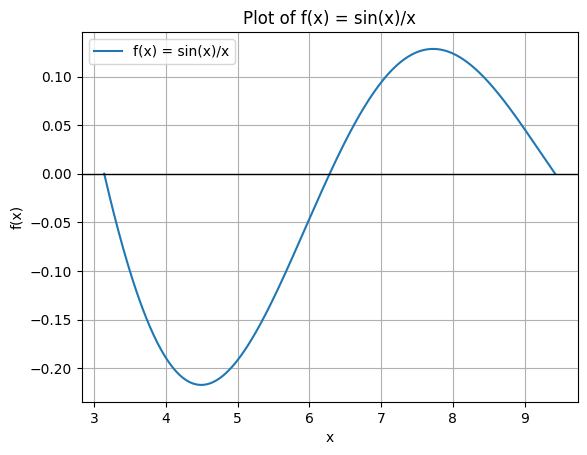

In [ ]:
# Define the function f(x) = sin(x)/x
def f(x):
    return np.sin(x) / x

# Trisection method (for finding local extrema)
def trisection(f, a, b, error, direction):
    if (b - a) < 2 * error:
        return (a + b) / 2
    c1 = (2 * a + b) / 3
    c2 = (a + 2 * b) / 3

    if f(c1) * direction < f(c2) * direction:
        return trisection(f, c1, b, error, direction)
    else:
        return trisection(f, a, c2, error, direction)

# Find the local maximum and minimum using trisection
min_val = trisection(f, np.pi, 3*np.pi, 0.0000001, -1)  # Minima (direction = -1)
max_val = trisection(f, np.pi, 3*np.pi, 0.0000001, 1)   # Maxima (direction = 1)

print("TRISECTION RESULTS:")
print("Local minimum found at x = " + str(min_val) + ", f(x) = " + str(f(min_val)))
print("Local maximum found at x = " + str(max_val) + ", f(x) = " + str(f(max_val)))

# Gradient descent method
def derivative(f, x):
    h = 0.000001
    return (f(x + h) - f(x)) / h  # Derivative approximation

def gradientDescent(f, a, parameter, tolerance):
    c = a - parameter * derivative(f, a)
    while abs(c - a) > tolerance:
        a = c
        c = a - parameter * derivative(f, a)
    return c

# Find the local minima and maxima using gradient descent
# For maxima, we maximize the function by moving in the opposite direction of the gradient.
min_point = gradientDescent(f, 2*np.pi, 0.1, 0.0000001)    # Starting near the middle of the interval
max_point = gradientDescent(f, 2*np.pi, -0.1, 0.0000001)   # Starting near the left end of the interval

print("GRADIENT DESCENT RESULTS:")
print("Local minimum found at x = " + str(min_point) + ", f(x) = " + str(f(min_point)))
print("Local maximum found at x = " + str(max_point) + ", f(x) = " + str(f(max_point)))


# Plot the function to visually check for local minima and maxima
x_vals = np.linspace(np.pi, 3*np.pi, 500)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = sin(x)/x")
plt.axhline(0, color='black', linewidth=1)
plt.title("Plot of f(x) = sin(x)/x")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


#09.
##The function f(x, y) = x^3 + 2xy − 6x − 4y^2 + 2 has a local maximum at some point close to (−1.5, −0.5). Plug this initial guess in the gradient ascent method with appropriate parameter in order to improve the guess and stop when two consecutive approximations are at distance less than 10^−4
.

In [ ]:
# Define the function f(x, y)
def f(x, y):
    return x**3 + 2*x*y - 6*x - 4*y**2 + 2

def gradient(f,x,y):
  h = 0.000001
  return [(f(x+h,y)-f(x,y))/h,(f(x,y+h)-f(x,y))/h]

def distance(a,b):
  return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

# Gradient Ascent method
def gradientAscent(f, a, parameter, tolerance):
    c = [a[0] + parameter * gradient(f, a[0], a[1])[0], a[1] + parameter * gradient(f, a[0], a[1])[1]] #Change the sign - to a + because is the ascent
    if distance(c, a) < tolerance:
        return c
    else:
        return gradientAscent(f, c, parameter, tolerance)


# Gradient Ascent with a parameter of 0.1 and tolerance 10^-4 between -1.5 and -0.5
result = gradientAscent(f, [-1.5,-0.5], 0.1, 0.0001)

print("Local maximum found at: " + str(result) + ", f(x, y) = " + str(f(result[0], result[1])))

Local maximum found at: [-1.5000161435309565, -0.375020509776391], f(x, y) = 8.187499997806832


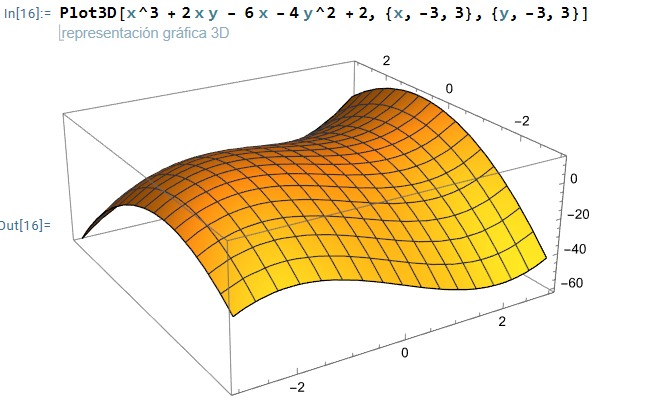

#**Interpolation And Approximation**

#10
##We are maintaining a dating website that helps people meet and contact other people. It has been running for 5 years but the manager has decided it is a good moment to move on to a different project because the number of users that successfully find a date has been decreasing recently according to the following stats:
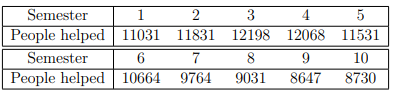

###We would like to estimate how many users will find a date in the next 5 years. Give the approximate answer to this question using least squares:
####(a) by the straight line that best fits these points
####(b) by the parabola that best fits these points.
####(c) by the function of the form f(t) = a + bt + c sin(t) that best fits these points.
#####Plot all the approximations up to the twentieth semester, along with the approximation points, in the same axes. What can you say in view of the results? (Notice that last approach introduces the sine term because we believe that the behaviour could be periodic.)


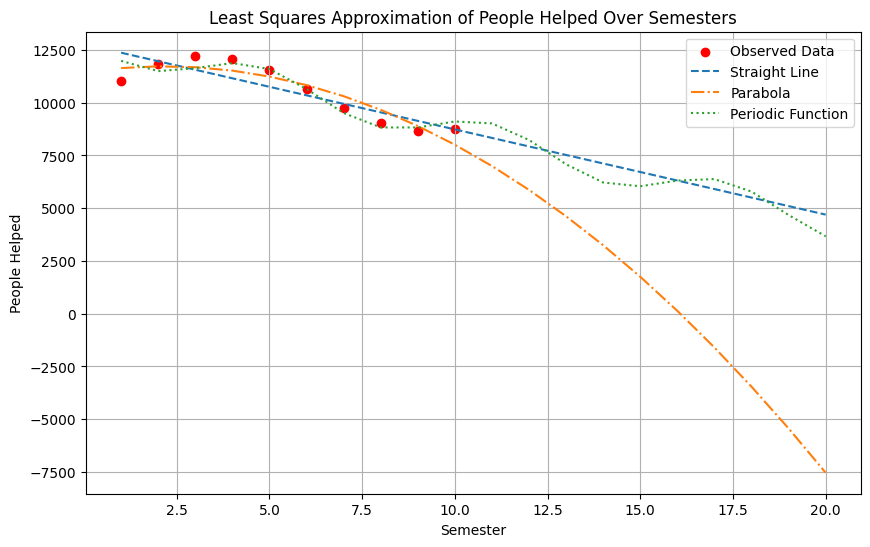

Predictions for semesters 11 to 20:
Straight Line: [8329.13333333 7925.43030303 7521.72727273 7118.02424242 6714.32121212
 6310.61818182 5906.91515152 5503.21212121 5099.50909091 4695.80606061]
Parabola: [ 6997.21666667  5867.01363636  4615.72727273  3243.35757576
  1749.90454545   135.36818182 -1600.25151515 -3456.95454545
 -5434.74090909 -7533.61060606]
Periodic Function: [9016.25769741 8233.59680692 7080.4138823  6217.37073168 6038.37599303
 6308.42734902 6379.67157377 5787.03780102 4675.8215338  3668.10062896]


In [20]:
# Given data
semesters = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
peopleHelped = np.array([11031, 11831, 12198, 12068, 11531, 10664, 9764, 9031, 8647, 8730])

# Approximation by a straight line
def u1(t):
    return 1

def u2(t):
    return t

def innerProduct(f, g, x):
    return sum(f(x[i]) * g(x[i]) for i in range(len(x)))

def innerProductList(f, y, x):
    return sum(f(x[i]) * y[i] for i in range(len(x)))

matrixLine = np.array([
    [innerProduct(u1, u1, semesters), innerProduct(u1, u2, semesters)],
    [innerProduct(u2, u1, semesters), innerProduct(u2, u2, semesters)]
])
vectorLine = np.array([
    innerProductList(u1, peopleHelped, semesters),
    innerProductList(u2, peopleHelped, semesters)
])
coefficientsLine = np.linalg.solve(matrixLine, vectorLine)

def lineApprox(t):
    return coefficientsLine[0] * u1(t) + coefficientsLine[1] * u2(t)

# Approximation by a parabola
def u3(t):
    return t**2

matrixParabola = np.array([
    [innerProduct(u1, u1, semesters), innerProduct(u1, u2, semesters), innerProduct(u1, u3, semesters)],
    [innerProduct(u2, u1, semesters), innerProduct(u2, u2, semesters), innerProduct(u2, u3, semesters)],
    [innerProduct(u3, u1, semesters), innerProduct(u3, u2, semesters), innerProduct(u3, u3, semesters)]
])
vectorParabola = np.array([
    innerProductList(u1, peopleHelped, semesters),
    innerProductList(u2, peopleHelped, semesters),
    innerProductList(u3, peopleHelped, semesters)
])
coefficientsParabola = np.linalg.solve(matrixParabola, vectorParabola)

def parabolaApprox(t):
    return coefficientsParabola[0] * u1(t) + coefficientsParabola[1] * u2(t) + coefficientsParabola[2] * u3(t)

# Approximation by a periodic function (f(t) = a + bt + c*sin(t))
def uSin(t):
    return np.sin(t)

matrixPeriodic = np.array([
    [innerProduct(u1, u1, semesters), innerProduct(u1, u2, semesters), innerProduct(u1, uSin, semesters)],
    [innerProduct(u2, u1, semesters), innerProduct(u2, u2, semesters), innerProduct(u2, uSin, semesters)],
    [innerProduct(uSin, u1, semesters), innerProduct(uSin, u2, semesters), innerProduct(uSin, uSin, semesters)]
])
vectorPeriodic = np.array([
    innerProductList(u1, peopleHelped, semesters),
    innerProductList(u2, peopleHelped, semesters),
    innerProductList(uSin, peopleHelped, semesters)
])
coefficientsPeriodic = np.linalg.solve(matrixPeriodic, vectorPeriodic)

def periodicApprox(t):
    return coefficientsPeriodic[0] * u1(t) + coefficientsPeriodic[1] * u2(t) + coefficientsPeriodic[2] * uSin(t)

# Predictions for semesters 1 to 20
semestersFuture = np.arange(1, 21)
linePrediction = lineApprox(semestersFuture)
parabolaPrediction = parabolaApprox(semestersFuture)
periodicPrediction = periodicApprox(semestersFuture)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(semesters, peopleHelped, color="red", label="Observed Data")
plt.plot(semestersFuture, linePrediction, label="Straight Line", linestyle="--")
plt.plot(semestersFuture, parabolaPrediction, label="Parabola", linestyle="-.")
plt.plot(semestersFuture, periodicPrediction, label="Periodic Function", linestyle=":")

plt.xlabel("Semester")
plt.ylabel("People Helped")
plt.title("Least Squares Approximation of People Helped Over Semesters")
plt.legend()
plt.grid(True)
plt.show()

# Predictions for next 5 years
print("Predictions for semesters 11 to 20:")
print("Straight Line:", linePrediction[10:20])
print("Parabola:", parabolaPrediction[10:20]) #Ask if it is normal that goues below 0
print("Periodic Function:", periodicPrediction[10:20])

#11.
##We have been training an AI to recognize whether or not a given text has been writen by another AI. It has been running for seven weeks and tested by the end of each week. The results of the first 10 weeks are not conclusive, but it has been performing better and better (starting at week 11) according to the following table:
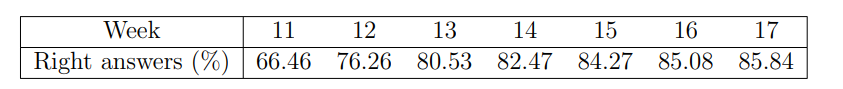
###We would like to stop training when it hits a 90% of right answers in the tests, but it would be helpful to know it in advance since running the program is extremely energy-consuming. To get an estimate, you are asked to find the function f(t) =  a1 + a2/t + a3/t^2 + a4/t^3 that best approximates these data in the sense of least squares.
####(a) Plot the set of points together with the best approximation in the above sense.
####(b) Find the first value of t such that f(t) ≥ 90 to get the estimate.
####(c) Find the maximum percentage of right answers this AI can get according to this model.

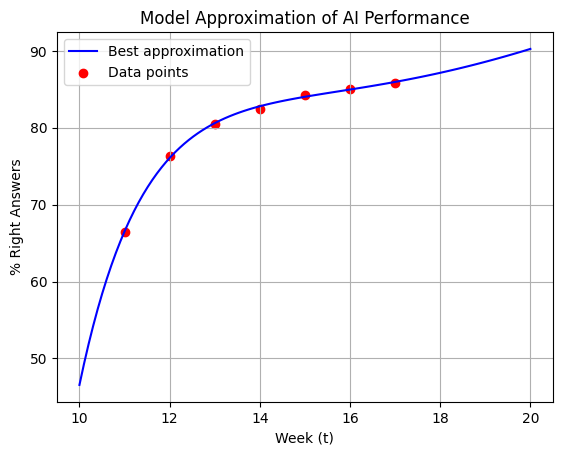

(b) The first value of t where f(t) ≥ 90 is: 19.900000000000027
(c) The maximum percentage of right answers according to the model is: 100%


In [61]:
# Given data for weeks and the corresponding percentage of correct answers
weeks = np.array([11, 12, 13, 14, 15, 16, 17])
percentRight = np.array([66.46, 76.26, 80.53, 82.47, 84.27, 85.08, 85.84])

# Define the basis functions for the approximation (f(t) = a1 + a2/t + a3/t^2 + a4/t^3)
def u1(t):
    return np.ones_like(t)  # a constant term, f(t) = a1 (side note - np.ones_like generate an array of 1's of the size of what is inside the parenthesis (t) )

def u2(t):
    return 1/t  # f(t) = a2/t

def u3(t):
    return 1/t**2  # f(t) = a3/t^2

def u4(t):
    return 1/t**3  # f(t) = a4/t^3

# Calculate the inner product for a given function f and g over the input array x
def innerProduct(f, g, x):
    return np.sum(f(x) * g(x))

# Calculate the inner product of a function f with the values y over the input array x
def innerProductList(f, y, x):
    return np.sum(f(x) * y)

# Set up the system of equations for the least squares method
A = np.array([
    [innerProduct(u1, u1, weeks), innerProduct(u1, u2, weeks), innerProduct(u1, u3, weeks), innerProduct(u1, u4, weeks)],
    [innerProduct(u2, u1, weeks), innerProduct(u2, u2, weeks), innerProduct(u2, u3, weeks), innerProduct(u2, u4, weeks)],
    [innerProduct(u3, u1, weeks), innerProduct(u3, u2, weeks), innerProduct(u3, u3, weeks), innerProduct(u3, u4, weeks)],
    [innerProduct(u4, u1, weeks), innerProduct(u4, u2, weeks), innerProduct(u4, u3, weeks), innerProduct(u4, u4, weeks)]
])

B = np.array([
    innerProductList(u1, percentRight, weeks),
    innerProductList(u2, percentRight, weeks),
    innerProductList(u3, percentRight, weeks),
    innerProductList(u4, percentRight, weeks)
])

# Solve the system of equations A * X = B
X = np.linalg.solve(A, B)

# Define the approximation function f(t) = a1 + a2/t + a3/t^2 + a4/t^3
def approximation(t):
    return X[0]*u1(t) + X[1]*u2(t) + X[2]*u3(t) + X[3]*u4(t)

# Plot the results
fig, ax = plt.subplots()
t = np.linspace(10, 20, 100)  # Generate a range of t values for plotting
z = approximation(t)  # Get the approximation values for the range of t

# Plot the approximation curve and the original data points
ax.plot(t, z, label="Best approximation", color='blue')
ax.scatter(weeks, percentRight, color='red', label="Data points")

ax.set_xlabel("Week (t)")
ax.set_ylabel("% Right Answers")
ax.set_title("Model Approximation of AI Performance")
ax.grid(True)
ax.legend()

plt.show()

# (b) Find the first value of t such that f(t) ≥ 90
def findTFor90(f):
    t = 18
    while f(t) < 90:
        t += 0.1
    return t

# Directly return t
tFor90 = findTFor90(approximation)
print("(b) The first value of t where f(t) ≥ 90 is: " + str(tFor90))

# (c) Maximum percentage of right answers
maxPercentage = X[0]  # As t → ∞, the other terms become negligible
if(maxPercentage > 100):
  maxPercentage = 100 #A trifling patch
print("(c) The maximum percentage of right answers according to the model is: " + str(maxPercentage)+"%")

#12
##We would like to approximate the function f(x) = x^x in the interval [0, 1] by means of a spline curve. To this end, we consider the partition of [0, 1] in four subintervals of width 0.25. Plot some axes where you represent the following items together:
###(a) the graph of f(x) on the domain [0, 1],
###(b) a cubic Hermite spline that interpolates f(x) on the points of the partition

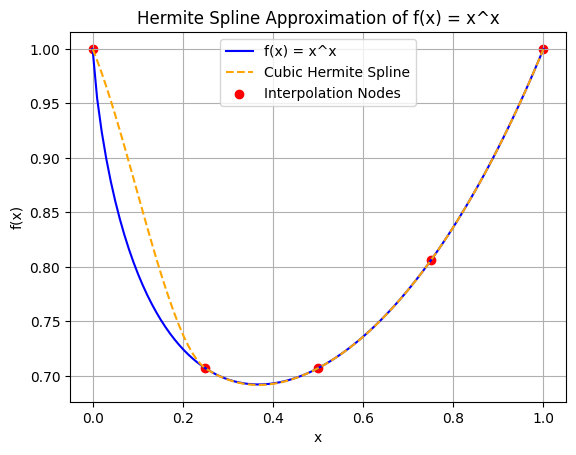

In [ ]:
#I'm not really sure if the first interval shall be like that

def dividedDifferences(data):
    M = []
    nodes = []
    indices = []
    row = []
    for i in range(len(data)):
        for j in range(1, len(data[i])):
            nodes.append(data[i][0])
            row.append(data[i][1])
            indices.append(i)
    M.append(row)
    n = len(nodes)

    for i in range(1, n):
        row = []
        for j in range(n - i):
            if nodes[j] != nodes[j + i]:
                row.append((M[i - 1][j] - M[i - 1][j + 1]) / (nodes[j] - nodes[j + i]))
            else:
                row.append(data[indices[j]][i + 1] / math.factorial(i))
        M.append(row)

    return [row[0] for row in M]

def hermiteInterpolation(t, data):
    dd = dividedDifferences(data)
    nodes = []
    for i in range(len(data)):
        for j in range(1, len(data[i])):
            nodes.append(data[i][0])
    n = len(nodes) - 1

    result = dd[0]
    product = 1
    for i in range(1, n + 1):
        product = product * (t - nodes[i - 1])
        result = result + dd[i] * product
    return result

def f(x):
  if x == 0:
    return 1
  else:
    return x**x

#f'(x) = x^x(ln(x)+1)
def derivative(x):
  if x == 0:
    return 1
  else:
    return (x**x)*(np.log(x) + 1)

def createSpline(t, points):
    return hermiteInterpolation(t, points)

def spline(t):
    if t <= 0.25:
        return createSpline(t, [[0, f(0), -derivative(0)], [0.25, f(0.25), derivative(0.25)]])
    elif t <= 0.5:
        return createSpline(t, [[0.25, f(0.25), derivative(0.25)], [0.5, f(0.5), derivative(0.5)]])
    elif t <= 0.75:
        return createSpline(t, [[0.5, f(0.5), derivative(0.5)], [0.75, f(0.75), derivative(0.75)]])
    else:
        return createSpline(t, [[0.75, f(0.75), derivative(0.75)], [1, f(1), derivative(1)]])

# Create the plot
fig, ax = plt.subplots()

# Original function
x = np.linspace(0, 1, 100)
y = [f(t) for t in x]

# Hermite spline approximation
z = [spline(t) for t in x]

# Plot function and spline
ax.plot(x, y, label="f(x) = x^x", color="blue")
ax.plot(x, z, label="Cubic Hermite Spline", color="orange", linestyle="--")

# Plot nodes
nodes_x = [0, 0.25, 0.5, 0.75, 1]
nodes_y = [f(t) for t in nodes_x]
ax.scatter(nodes_x, nodes_y, color="red", label="Interpolation Nodes")

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Hermite Spline Approximation of f(x) = x^x")
ax.grid(True)
ax.legend()

plt.show()


#13.
##The lemniscate of Bernouilli is a curve whose shape resembles the symbol of infinity ∞. It can be parametrised as the following trajectory in the plane:
##x(t) = cos(t)/1 + sin^2(t),
##y(t) = sin(t)*cos(t)/1 + sin^2(t),
## t ∈ [0, 2π]
##that is, x(t) and y(t) are the coordinates of the position at time t. Plot some axes where you represent the following items together:
###(a) the lemniscate of Bernouilli given by the above parametrisation,
###(b) a double cubic Hermite spline (Bezier curve) that interpolates the above data by splitting the interval [0, 2π] in 8 subintervals.

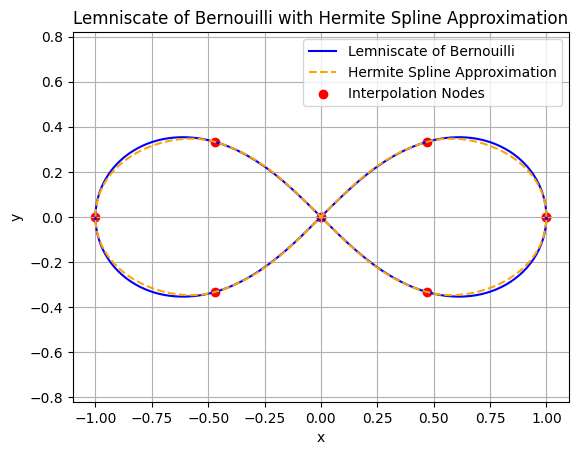

In [ ]:
def dividedDifferences(data):
    matrix = []
    nodes = []
    indices = []
    row = []
    for i in range(len(data)):
        for j in range(1, len(data[i])):
            nodes.append(data[i][0])
            row.append(data[i][1])
            indices.append(i)
    matrix.append(row)
    n = len(nodes)

    for i in range(1, n):
        row = []
        for j in range(n - i):
            if nodes[j] != nodes[j + i]:
                row.append((matrix[i - 1][j] - matrix[i - 1][j + 1]) / (nodes[j] - nodes[j + i]))
            else:
                row.append(data[indices[j]][i + 1] / math.factorial(i))
        matrix.append(row)

    return [row[0] for row in matrix]

def hermiteInterpolation(t, data):
    dd = dividedDifferences(data)
    nodes = []
    for i in range(len(data)):
        for j in range(1, len(data[i])):
            nodes.append(data[i][0])
    n = len(nodes) - 1

    result = dd[0]
    product = 1
    for i in range(1, n + 1):
        product *= (t - nodes[i - 1])
        result += dd[i] * product
    return result

def xt(t):
    return np.cos(t) / (1 + np.sin(t)**2)

def yt(t):
    return (np.sin(t) * np.cos(t)) / (1 + np.sin(t)**2)

def dxt(t):
    return -2 * np.cos(t)**2 * (1 + np.sin(t)**2)**-2 * np.sin(t)- np.sin(t) * (1 + np.sin(t)**2)**-1 #Epic

def dyt(t):
    return -2 * np.sin(t)**2 * np.cos(t)**2 * (1 + np.sin(t)**2)**-2 - np.sin(t)**2 * (1 + np.sin(t)**2)**-1 + np.cos(t)**2 * (1 + np.sin(t)**2)**-1 #Epic x2

def createHermiteSpline(t, xPoints, yPoints):
    xSpline = hermiteInterpolation(t, xPoints)
    ySpline = hermiteInterpolation(t, yPoints)
    return xSpline, ySpline

# Create partition nodes
numIntervals = 8
tNodes = np.linspace(0, 2 * np.pi, numIntervals + 1)
xNodes = [xt(t) for t in tNodes]
yNodes = [yt(t) for t in tNodes]
dxNodes = [dxt(t) for t in tNodes]
dyNodes = [dyt(t) for t in tNodes]

# Create Hermite spline points
def hermiteSpline(t):
    for i in range(len(tNodes) - 1):
        if tNodes[i] <= t <= tNodes[i + 1]:
            xPoints = [[tNodes[i], xNodes[i], dxNodes[i]], [tNodes[i + 1], xNodes[i + 1], dxNodes[i + 1]]]
            yPoints = [[tNodes[i], yNodes[i], dyNodes[i]], [tNodes[i + 1], yNodes[i + 1], dyNodes[i + 1]]]
            return createHermiteSpline(t, xPoints, yPoints)
    return None, None

# Plot the lemniscate and Hermite spline approximation
fig, ax = plt.subplots()

# Lemniscate points
tVals = np.linspace(0, 2 * np.pi, 500)
xVals = [xt(t) for t in tVals]
yVals = [yt(t) for t in tVals]

# Hermite spline points
splineXVals = []
splineYVals = []
for t in tVals:
    xSpline, ySpline = hermiteSpline(t)
    splineXVals.append(xSpline)
    splineYVals.append(ySpline)

# Plot original lemniscate
ax.plot(xVals, yVals, label="Lemniscate of Bernouilli", color="blue")

# Plot Hermite spline approximation
ax.plot(splineXVals, splineYVals, label="Hermite Spline Approximation", linestyle="--", color="orange")

# Plot interpolation nodes
ax.scatter(xNodes, yNodes, color="red", label="Interpolation Nodes")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Lemniscate of Bernouilli with Hermite Spline Approximation")
ax.legend()
ax.grid(True)

plt.axis('equal')
plt.show()

#14.
##Choose one of the following three shapes and plot a double cubic Hermite spline (Bezier curve) that looks like it:
###I chose __

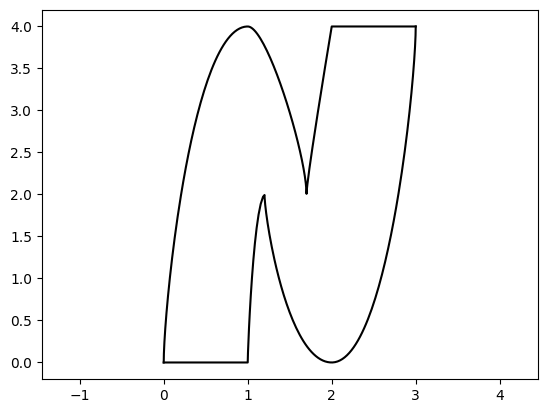

In [ ]:
# Código para generar el símbolo tipo pica utilizando splines cúbicos de Hermite.

#Coordenadas (0,0)(0.5,1)(1,5)(1.5,1)(2,0)
#Vectores 0 -1 - 2 - 3 - 4 - 5 (siendo ciclica)

#def spadeXUpper(t):
  #if t>=0 and t<= 1:
    #return hermiteInterpolation(t,[[0,0,0.5],[1,0.5,0.5]])
  #elif t>1 and t<= 2:
    #return hermiteInterpolation(t,[[1,0.5,-2],[2,1,2]])
  #elif t>2 and t<= 3:
    #return hermiteInterpolation(t,[[2,1,0],[2,2,0]])
  #elif t>3 and t<= 4:
    #return hermiteInterpolation(t,[[2,2,0],[3,3,0]])


#Definimos la interpolacion de Hermite
import numpy as np
import matplotlib.pyplot as plt
import math

def dividedDifferences(data):
    M = []
    nodes = []
    indices = []
    row = []
    for i in range(len(data)):
        for j in range(1, len(data[i])):
            nodes.append(data[i][0])
            row.append(data[i][1])
            indices.append(i)
    M.append(row)
    n = len(nodes)

    for i in range(1, n):
        row = []
        for j in range(n - i):
            if (nodes[j] != nodes[j + i]):
                # caso en el que los nodos son diferentes: aplicar la diferencia dividida habitual
                row.append((M[i - 1][j] - M[i - 1][j + 1]) / (nodes[j] - nodes[j + i]))
            else:
                # caso en el que el primer y último nodo coinciden: aplicar la derivada
                row.append(data[indices[j]][i + 1] / math.factorial(i))
        M.append(row)

    return [row[0] for row in M]

def hermiteInterpolation(t, data):
    dd = dividedDifferences(data)
    nodes = []
    for i in range(len(data)):
        for j in range(1, len(data[i])):
            nodes.append(data[i][0])
    n = len(nodes) - 1

    result = dd[0]
    product = 1
    for i in range(1, n + 1):
        product = product * (t - nodes[i - 1])
        result = result + dd[i] * product
    return result

def spadeXUpper(t):
  if t>=0 and t<= 1:
    return hermiteInterpolation(t,[[0,0,0],[1,1,2]])
  elif t>1 and t<= 1.7:
    return hermiteInterpolation(t,[[1,1,1],[1.7,1.7,0]])
  elif t>1.7 and t<= 2:
    return hermiteInterpolation(t,[[1.7,1.7,0],[2,2,0]])
  elif t>2 and t<= 3:
    return hermiteInterpolation(t,[[2,2,0],[3,3,0]])

def spadeYUpper(t):
  if t>=0 and t<= 1:
    return hermiteInterpolation(t,[[0,0,2],[1,4,0]])
  elif t>1 and t<= 1.7:
    return hermiteInterpolation(t,[[1,4,0],[1.7,2,-2]])
  elif t>1.7 and t<= 2:
    return hermiteInterpolation(t,[[1.7,2,2],[2,4,0]])
  elif t>2 and t<= 3:
    return hermiteInterpolation(t,[[2,4,0],[3,4,0]])


def spadeXLower(t):
  if t>=0 and t<= 1:
    return hermiteInterpolation(t,[[0,0,0],[1,1,0]])
  elif t>1 and t<= 1.2:
    return hermiteInterpolation(t,[[1,1,0],[1.2,1.2,2]])
  elif t>1.2 and t<= 2:
    return hermiteInterpolation(t,[[1.2,1.2,0],[2,2,2]])
  elif t>2 and t<= 3:
    return hermiteInterpolation(t,[[2,2,2],[3,3,0]])

def spadeYLower(t):
  if t>=0 and t<= 1:
    return hermiteInterpolation(t,[[0,0,0],[1,0,0]])
  elif t>1 and t<= 1.2:
    return hermiteInterpolation(t,[[1,0,2],[1.2,2,2]])
  elif t>1.2 and t<= 2:
    return hermiteInterpolation(t,[[1.2,2,-1],[2,0,0]])
  elif t>2 and t<= 3:
    return hermiteInterpolation(t,[[2,0,0],[3,4,2]])

fig, ax = plt.subplots()

t = np.linspace(0,3,200)
#plot upper part
xUpper = [spadeXUpper(s) for s in t]
yUpper = [spadeYUpper(s) for s in t]
ax.plot(xUpper,yUpper,color="black")

#plot lower part
xUpper = [spadeXLower(s) for s in t]
yUpper = [spadeYLower(s) for s in t]
ax.plot(xUpper,yUpper,color="black")

plt.axis('equal') #This forces the aspect ratio to be 1:1
plt.show()

#**Numerical Integration**

#15.
##The beta function is defined for all x, y > 0 by the integral
##B(x, y) = Z[0,1] t^x−1*(1 − t)^y−1dt
##Write functions BetaRect(x,y), BetaTrap(x,y), BetaSimp(x,y) and BetaRomb(x,y) that approximate the above value B(x, y) by the following methods, respectively:
###(a) Rectangular integration with 8 subintervals.
###(b) Trapezoidal integration with 8 subintervals.
###(c) Simpson’s formula with 8 subintervals.
###(d) Romberg’s method with 8 subintervals.
####The exact values B(m, n) = (m−1)!(n−1)!/(m+n−1)! for positive integers m and n are well known and we would like to use them to test our four functions. Find the average relative error of the four functions when m and n are integers in the range from 1 to 10 (you have to consider the average of 100 numbers for each function).

In [ ]:
# Rectangular Integration
def rectangularIntegration(f, a, b, n):
    h = (b - a) / n  # Step of integration
    totalSum = 0
    x = a
    for i in range(n):
        totalSum = totalSum + h * f(x + h / 2)
        x = x + h
    return totalSum

# Trapezoidal Integration
def trapezoidalIntegration(f, a, b, n):
    h = (b - a) / n  # Step of integration
    totalSum = 0
    x = a
    for i in range(n):
        totalSum = totalSum + h * (f(x) + f(x + h)) / 2
        x = x + h
    return totalSum

# Simpson's Integration
def simpsonIntegration(f, a, b, n):
    h = (b - a) / n  # Step of integration
    totalSum = 0
    x = a
    for i in range(n):
        totalSum = totalSum + h * (f(x) + 4 * f(x + h / 2) + f(x + h)) / 6
        x = x + h
    return totalSum

# Romberg Integration
def rombergIntegration(f, a, b, n):
    h = (b - a) / 2
    R = [[h * (f(a) + f(b))]]
    for i in range(1, n + 1):
        totalSum = 0
        for k in range(1, 2**(i - 1) + 1):
            totalSum = totalSum + f(a + (2 * k - 1) * h)
        row = [R[i - 1][0] / 2 + h * totalSum]
        for j in range(1, i + 1):
            row.append(((4**j) * row[j - 1] - R[i - 1][j - 1]) / (4**j - 1))
        R.append(row)
        h = h / 2
    return R[n][n]

# Beta function using Rectangular Integration
def betaRect(x, y):
    def f(t):
        return t**(x - 1) * (1 - t)**(y - 1)

    return rectangularIntegration(f, 0, 1, 8)

# Beta function using Trapezoidal Integration
def betaTrap(x, y):
    def f(t):
        return t**(x - 1) * (1 - t)**(y - 1)

    return trapezoidalIntegration(f, 0, 1, 8)

# Beta function using Simpson's Integration
def betaSimp(x, y):
    def f(t):
        return t**(x - 1) * (1 - t)**(y - 1)

    return simpsonIntegration(f, 0, 1, 8)

# Beta function using Romberg Integration
def betaRomb(x, y):
    def f(t):
        return t**(x - 1) * (1 - t)**(y - 1)

    return rombergIntegration(f, 0, 1, 3) #3 porque romberg lo que coge es el exponente de la base 2 a la que esta elevado (2^3 = 8)

# Exact Beta function for integers m and n
def exactBeta(m, n):
    return (math.factorial(m - 1) * math.factorial(n - 1)) / math.factorial(m + n - 1)

# Calculate average relative error for each method
def averageRelativeError(method):
    totalError = 0
    errorCount = 0
    for m in range(1, 11):
        for n in range(1, 11):
            exactValue = exactBeta(m, n)
            approxValue = method(m, n)
            relativeError = abs(exactValue - approxValue) / exactValue
            totalError += relativeError
            errorCount += 1 #Contador para que llegue a 100 iterations (10x10)
    return totalError / errorCount


print("Average Relative Errors: ")
print("Average Relative Error (Rectangular): " + str(averageRelativeError(betaRect)))
print("Average Relative Error (Trapezoidal): " + str(averageRelativeError(betaTrap)))
print("Average Relative Error (Simpson): " + str(averageRelativeError(betaSimp)))
print("Average Relative Error (Romberg): " + str(averageRelativeError(betaRomb)))


Average Relative Errors: 
Average Relative Error (Rectangular): 0.010385684683644756
Average Relative Error (Trapezoidal): 0.020420092656259617
Average Relative Error (Simpson): 0.000343300478035817
Average Relative Error (Romberg): 0.007402916050870231


#16.
##We would like to approximate the integral
##Z[0,2π] sin(x)/x dx,
##but we are not happy with the standard integration methods because they do not provide us with an estimate of the error. We actually need an interval of width 10^−3 where the value of the integral is guaranteed to lie.
###(a) The function f(x) = sin(x)/x is decreasing on an interval [0, a] and then increasing on [a, 2π]. Find an approximation of a by the trisection method with error less than 10^−7.
###(b) Approximate the integrals of f(x) in [0, a] and [a, 2π] by upper sums and lower sums such that the difference between the upper and lower sums are less than 5 · 10^−4 (a half of the desired error). This means that you have to determine the number of subintervals which give you this precision.
###(c) Add the lower and upper estimates for the two integrals to solve the question

In [18]:
#⚠ WARNING! IT TAKES UP TO 3 MINUTES (AT LEAST IN MY COMPUTER) TO COMPUTE THE RESULT, GIVEN THAT THERE ARE 11746 ITERATIONS ⚠

# Function to approximate using the trisection method
def f(x):
  if x != 0:
    return np.sin(x) / x
  else:
    return 1  # Handle x = 0 case for sin(x)/x

def trisection(f, a, b, error, direction):
    if b - a < 2 * error:
        return (a + b) / 2
    c1 = (2 * a + b) / 3
    c2 = (a + 2 * b) / 3
    if f(c1) * direction < f(c2) * direction:
        return trisection(f, c1, b, error, direction)
    else:
        return trisection(f, a, c2, error, direction)

# (a) Trisection method to find 'a' where the function changes from decreasing to increasing
aValue = trisection(f, 0, 2 * np.pi, 1e-7, -1)  # Direction -1 to find the minima
print("Approximate 'a' where the function changes behavior: " + str(aValue))

# Lower and Upper Sum Approximations

def lowerSum(f, a, b, n):
    h = (b - a) / n  # Step of integration
    totalSum = 0
    x = a
    for i in range(n):
        totalSum += h * f(x)
        x += h
    return totalSum

def upperSum(f, a, b, n):
    h = (b - a) / n  # Step of integration
    totalSum = 0
    x = a
    for i in range(n):
        totalSum += h * f(x + h)
        x += h
    return totalSum

# (b) Determine the number of subintervals such that the difference between upper and lower sums is less than 5e-4
def findSubintervals(f, a, b, targetError):
    n = 1
    while True:
        lower = lowerSum(f, aValue, b, n)
        upper = upperSum(f, aValue, b, n)
        if abs(upper - lower) < targetError:
            return n, lower, upper
        n += 1

# Compute subintervals for both intervals
n1, lower1, upper1 = findSubintervals(f, 0, a, 5e-4)
n2, lower2, upper2 = findSubintervals(f, aValue, 2 * np.pi, 5e-4)

print("Number of subintervals for [0, a]: " + str(n1) + ", Lower sum: " + str(lower1) + ", Upper sum: " + str(upper1))
print("Number of subintervals for [a, 2π]: " + str(n2) + ", Lower sum: " + str(lower2) + ", Upper sum: " + str(upper2))

# (c) Adding the lower and upper estimates for the two integrals
finalLowerSum = lower1 + lower2
finalUpperSum = upper1 + upper2

print("Final Lower Estimate for the integral: " + str(finalLowerSum))
print("Final Upper Estimate for the integral: " + str(finalUpperSum))

Approximate 'a' where the function changes behavior: 4.4934094180620665
Number of subintervals for [0, a]: 11746, Lower sum: -2.1484295295884226, Upper sum: -2.148929501701864
Number of subintervals for [a, 2π]: 778, Lower sum: -0.23767032487648698, Upper sum: -0.2371705825756155
Final Lower Estimate for the integral: -2.3860998544649097
Final Upper Estimate for the integral: -2.3861000842774795


#17.
##We would like to approximate the function f(x) = 3√(1 + x) in the interval [−0.5, 0.5] by a certain polynomial.
###(a) Plot the approximating polynomials in the sense of least-squares of degrees from 1 to 8 along with the function f(x). To compute integrals, we will use trapezoidal integration with 10 subintervals.
###(b) Consider 101 points evenly distributed in [−0.5, 0.5] (that is, they subdivide this interval into 100 subintervals of equal length). Find the maximum difference between f(x) and the polynomials as an indicator of how good these approximations are.

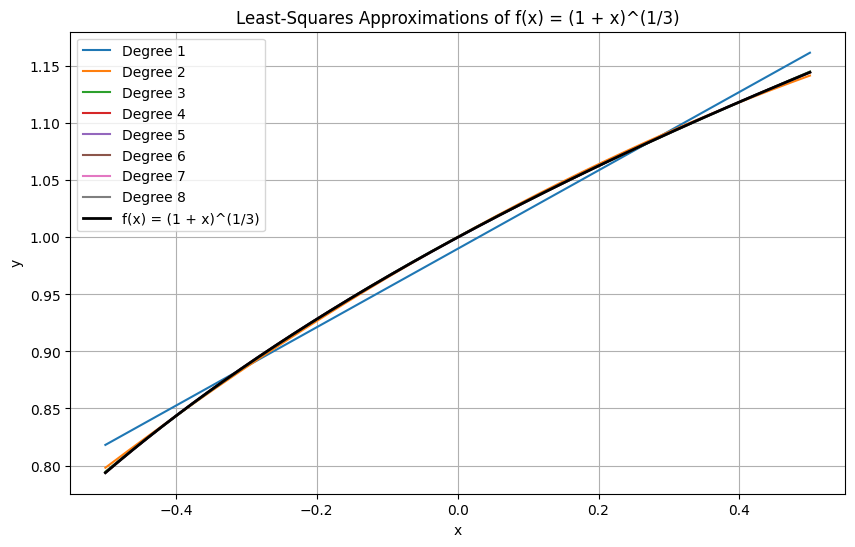

Maximum difference for degree 1: 0.024385125377554884
Maximum difference for degree 2: 0.004357002854236014
Maximum difference for degree 3: 0.0008716096645343674
Maximum difference for degree 4: 0.00018369803107254334
Maximum difference for degree 5: 3.979559734779148e-05
Maximum difference for degree 6: 8.751260356376633e-06
Maximum difference for degree 7: 1.9392879321289413e-06
Maximum difference for degree 8: 4.310513557204132e-07


In [79]:
# Define the function to approximate
def f(x):
    return (1 + x)**(1 / 3)

# Generate 101 evenly spaced points in the interval [-0.5, 0.5]
xPoints = np.linspace(-0.5, 0.5, 101)
yPoints = f(xPoints)

# Set up the interval for plotting the function and polynomials
a, b = -0.5, 0.5
xPlot = np.linspace(a, b, 1000)

# Calculate the coefficients of the least-squares polynomial
def calculateCoefficients(xPoints, yPoints, degree):
    n = len(xPoints)
    A = [[x**i for i in range(degree + 1)] for x in xPoints]

    ATA = [[sum(A[k][i] * A[k][j] for k in range(n)) for j in range(degree + 1)] for i in range(degree + 1)]
    ATy = [sum(A[k][i] * yPoints[k] for k in range(n)) for i in range(degree + 1)]

    coefficients = np.linalg.solve(ATA, ATy)
    return coefficients

# Evaluate the polynomial at given points
def evaluatePolynomial(coefficients, xValues):
    polyValues = []
    for x in xValues:
        value = 0
        for i in range(len(coefficients)):
            value += coefficients[i] * (x ** i)
        polyValues.append(value)
    return polyValues

# Plot the function and the approximating polynomials
plt.figure(figsize=(10, 6))

for degree in range(1, 9):
    coefficients = calculateCoefficients(xPoints, yPoints, degree)
    polyValues = evaluatePolynomial(coefficients, xPlot)

    plt.plot(xPlot, polyValues, label="Degree " + str(degree))

# Plot the original function
plt.plot(xPlot, f(xPlot), label="f(x) = (1 + x)^(1/3)", color="black", linewidth=2)

plt.title("Least-Squares Approximations of f(x) = (1 + x)^(1/3)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the maximum differences
maxDiffs = []

for degree in range(1, 9):
    coefficients = calculateCoefficients(xPoints, yPoints, degree)
    polyValues = evaluatePolynomial(coefficients, xPoints)

    differences = [abs(f(xPoints[i]) - polyValues[i]) for i in range(len(xPoints))]
    maxDiff = max(differences)
    maxDiffs.append(maxDiff)

    print("Maximum difference for degree " + str(degree) + ": " + str(maxDiff))


#18.
##Consider the initial value problem given by y′ + y = 2x^2 and y(2) = −1. Using Runge-Kutta integration with step h = 0.1:
###(a) Obtain an approximate solution in [1, 5].
###(b) Obtain an approximate solution in [0, 1].
###(c) Plot the approximations along with the exact solution
###y = 4 − 4x +2x^2 − 5e^(2−x)
###on the same axes in the interval [0, 5].

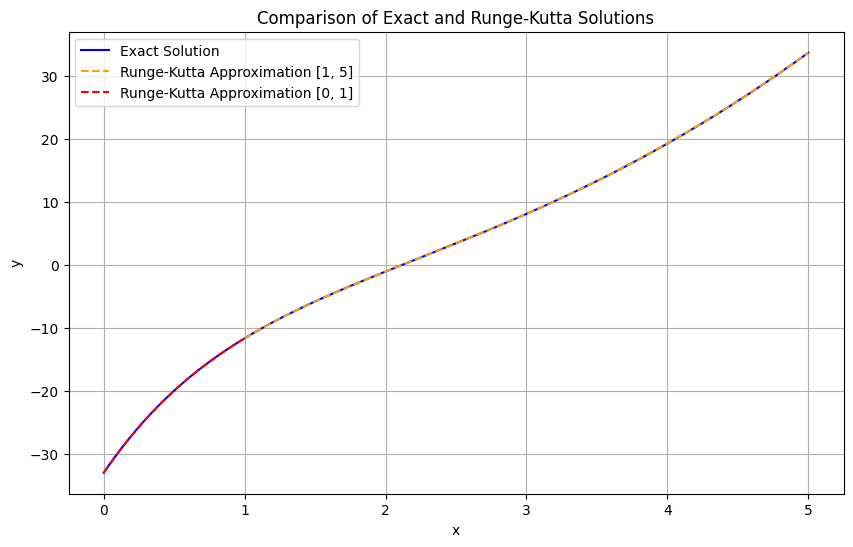

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 2 * x**2 - y

def rungeKuttaOde(f, x0, y0, xn, h):
    n = int((xn - x0) / h)
    listaX = [x0]
    listaY = [y0]
    x = x0
    y = y0
    for _ in range(n):
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h * k1 / 2)
        k3 = f(x + h / 2, y + h * k2 / 2)
        k4 = f(x + h, y + h * k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
        x = x + h
        listaX.append(x)
        listaY.append(y)
    return [listaX, listaY]

def exactSolution(x):
    return 4 - 4 * x + 2 * x**2 - 5 * np.exp(2 - x)

h = 0.1

# Solve in [1, 5] with corrected initial condition y(1) = 4 - 4 * 1 + 2 * 1**2 - 5 * np.exp(2 - 1)
initialY0 = exactSolution(1)
rk1To5 = rungeKuttaOde(f, 1, initialY0, 5, h)

# Solve in [0, 1] with corrected initial condition y(0) = 4 - 4 * 0 + 2 * 0**2 - 5 * np.exp(2 - 0)
initialY1 = exactSolution(0)
rk0To1 = rungeKuttaOde(f, 0, initialY1, 1, h)

# Plot exact solution and approximations
xExact = np.linspace(0, 5, 500)
yExact = exactSolution(xExact)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(xExact, yExact, label="Exact Solution", color="blue")
ax.plot(rk1To5[0], rk1To5[1], label="Runge-Kutta Approximation [1, 5]", linestyle="--", color="orange")
ax.plot(rk0To1[0], rk0To1[1], label="Runge-Kutta Approximation [0, 1]", linestyle="--", color="red")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Comparison of Exact and Runge-Kutta Solutions")
ax.legend()
ax.grid()

plt.show()

#19.
##Consider the initial value problem given by y′ = ((y−1)/(x+1))^2 and y(0) = 3. We would like to compute y(x) numerically in the interval [0, 1]
### (a) Obtain such a value using Euler’s method with step h = 0.2
### (b) Obtain such a value using Taylor’s method of order 2 with step h = 0.2
### (c) Plot the approximations along with the exact solution y(x) = (x+3)/(1−x).
#### Note that the exact solution has an asymptote at x = 1. If you implement item (a) in [0, 2] rather than [0, 1], what happens beyond x = 1?

#####Euler

<ipython-input-91-4cb489f6b042>:18: RuntimeWarning: divide by zero encountered in divide
  return (x + 3)/(1 - x)


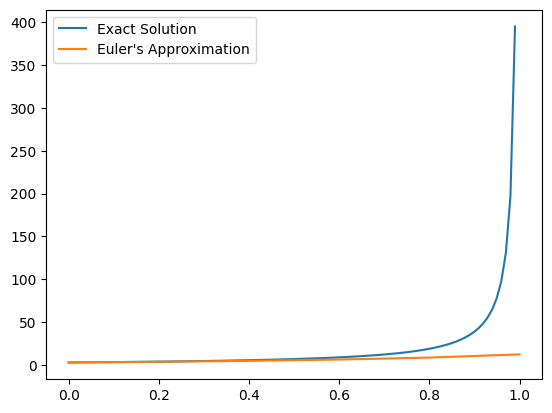

In [91]:
def f(x, y):
    return ((y - 1) / (x + 1)) ** 2

def eulerODE(f, x0, y0, xn, n):
    h = 0.2
    ListaX = [x0]
    ListaY = [y0]
    x = x0
    y = y0
    for i in range(1, n + 1):
        y = y + f(x, y) * h
        x = x + h
        ListaX.append(x)
        ListaY.append(y)
    return [ListaX, ListaY]

def exactSolution(x):
    return (x + 3)/(1 - x)

# Euler's method
L_euler = eulerODE(f, 0, 3, 1, 5)

# Exact solution
x = np.linspace(0, 1, 100)
y_exact = exactSolution(x)

# Plotting
fig, ax = plt.subplots()
ax.plot(x, y_exact, label="Exact Solution")
ax.plot(L_euler[0], L_euler[1], label="Euler's Approximation")
ax.legend()
plt.show()

#####Taylor

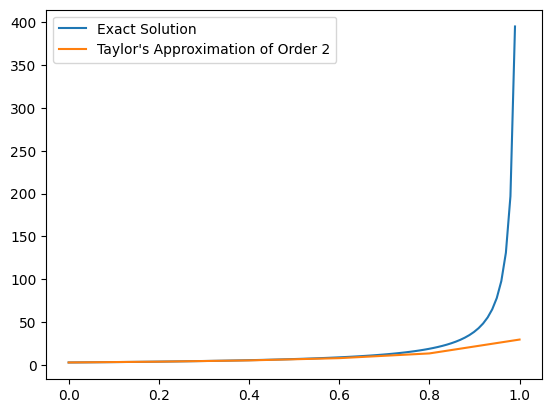

In [102]:
def partialX(f, x, y):
    h = 0.2
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def partialY(f, x, y):
    h = 0.2
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def taylorODE(f, x0, y0, xn, n):
    h = 0.2
    ListaX = [x0]
    ListaY = [y0]
    x = x0
    y = y0
    for i in range(1, n + 1):
        fx = f(x, y)
        dfx_dx = partialX(f, x, y)
        dfx_dy = partialY(f, x, y)
        y = y + fx * h + 0.5 * (dfx_dx + dfx_dy * fx) * h**2
        x = x + h
        ListaX.append(x)
        ListaY.append(y)
    return [ListaX, ListaY]

# Taylor's method of order 2
L_taylor = taylorODE(f, 0, 3, 1, 5)

# Plotting
fig, ax = plt.subplots()
ax.plot(x, y_exact, label="Exact Solution")
ax.plot(L_taylor[0], L_taylor[1], label="Taylor's Approximation of Order 2")
ax.legend()
plt.show()

#####c) Explication


When the interval is extended beyond x = 1, both Euler's method and Taylor's method may exhibit instability. This occurs because the exact solution possesses an asymptote at x = 1, where the solution's behavior becomes singular due to the denominator in the equation for y' approaching zero. As a result, both numerical methods may yield increasingly inaccurate results, and potentially diverge, as they approach this critical point.

For example, extending the interval to x=2 will likely lead to significant deviations from the exact solution. This discrepancy arises from the cumulative errors in the numerical approximation, which tend to escalate near the asymptote at x=1. Consequently, the numerical methods become less reliable, and the error grows as x increases.

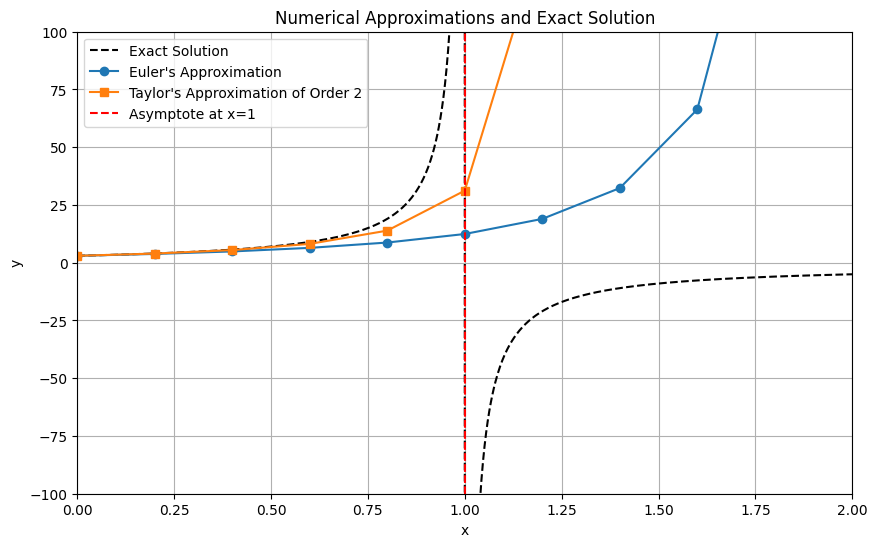

In [106]:
def f(x, y):
    return ((y - 1) / (x + 1)) ** 2

def eulerODE(f, x0, y0, xn, n):
    h = (xn - x0) / n
    ListaX = [x0]
    ListaY = [y0]
    x = x0
    y = y0
    for i in range(1, n + 1):
        y = y + f(x, y) * h
        x = x + h
        ListaX.append(x)
        ListaY.append(y)
    return [ListaX, ListaY]

def exactSolution(x):
    return (x + 3) / (1 - x)

def partialX(f, x, y):
    h = 1e-5
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def partialY(f, x, y):
    h = 1e-5
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def taylorODE(f, x0, y0, xn, n):
    h = (xn - x0) / n
    ListaX = [x0]
    ListaY = [y0]
    x = x0
    y = y0
    for i in range(1, n + 1):
        fx = f(x, y)
        dfx_dx = partialX(f, x, y)
        dfx_dy = partialY(f, x, y)
        y = y + fx * h + 0.5 * (dfx_dx + dfx_dy * fx) * h**2
        x = x + h
        ListaX.append(x)
        ListaY.append(y)
    return [ListaX, ListaY]

n = int((2 - 0) / 0.2)

# Compute approximations
L_euler = eulerODE(f, 0, 3, 2, n)
L_taylor = taylorODE(f, 0, 3, 2, n)

# Generate exact solution points
x_exact = np.linspace(0, 2, 1000)
y_exact = exactSolution(x_exact)

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot exact solution
ax.plot(x_exact, y_exact, label="Exact Solution", color="black", linestyle="--")

# Plot Euler's approximation
ax.plot(L_euler[0], L_euler[1], label="Euler's Approximation", marker="o", linestyle="-")

# Plot Taylor's approximation
ax.plot(L_taylor[0], L_taylor[1], label="Taylor's Approximation of Order 2", marker="s", linestyle="-")

# Highlight asymptote
ax.axvline(x=1, color="red", linestyle="--", label="Asymptote at x=1")

# Labels and legend
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Numerical Approximations and Exact Solution")
ax.legend()
ax.set_xlim([0, 2])
ax.set_ylim([-100, 100]) #To see entirely

# Show plot
plt.grid()
plt.show()

Repiting the other code with some little changes to plot everything it is crystal clear that it does not follow the asymptote

#20.
## An iron ball bounces inside the unit square given by the constraints 0 ≤ x ≤ 1 and 0 ≤ y ≤ 1 in the usual coordinates (x, y) of the plane. At time t = 0, it is thrown from the corner (0, 1) with speed (0, 2). Plot the approximate trajectory of the ball when 0 ≤ t ≤ 20 by Euler’s method with step h = 0.05. Consider each of the following incremental scenarios.
### (a) The only force acting on the ball is gravity, which will be simulated by the constant field F = (0, −1).
###(b) Also consider the air resistance, which will be simulated by a decrease of a 0.5% of the speed at each step.
###(c) Also consider the loss of energy each times it bounces, which will be simulated by a decrease of 5% of the speed each time it bounces.
###(d) Also consider a magned located at (0, 0) that attracts the ball, which will be simulated by the radial field F = (−0.1x, −0.1y).
